In [75]:
import glob
import time
import eyed3
import os
import ffmpeg
import librosa
import numpy as np
import pandas as pd
import IPython.display as ipd
import warnings
import seaborn as sns
from os import path
warnings.filterwarnings('ignore')

In [76]:
mp3s = glob.glob('/content/drive/MyDrive/dataset/*.mp3')

In [77]:
cols = "Title Artist Album Genre y sr".split()
df = pd.DataFrame([], columns=cols)

start_time = time.process_time()


for song_path in mp3s:
    audiofile = eyed3.load(song_path)
    y , sr = librosa.load(song_path)
    df = df.append({"Title": audiofile.tag.title,
              "Artist": audiofile.tag.artist,
              "Album": audiofile.tag.album,
              "Genre": audiofile.tag.genre,
                   "y":y,
                   "sr":sr} ,ignore_index=True)

print("The whole process took", time.process_time() - start_time, "seconds.")

Non standard genre name: alternative metal
Non standard genre name: alternative metal
Non standard genre name: alternative metal
Non standard genre name: alternative metal
Non standard genre name: alternative metal
Non standard genre name: alternative metal
Non standard genre name: alternative metal
Non standard genre name: alternative metal
Non standard genre name: alternative metal
Non standard genre name: alternative metal


The whole process took 124.9928288829999 seconds.


In [78]:
print(df)

         Title  ...     sr
0      Du hast  ...  22050
1        Sonne  ...  22050
2      AMERIKA  ...  22050
3  DEUTSCHLAND  ...  22050
4        Engel  ...  22050
5    MEIN LAND  ...  22050
6   KEINE LUST  ...  22050
7    OHNE DICH  ...  22050
8     HAIFISCH  ...  22050
9     ROSENROT  ...  22050

[10 rows x 6 columns]


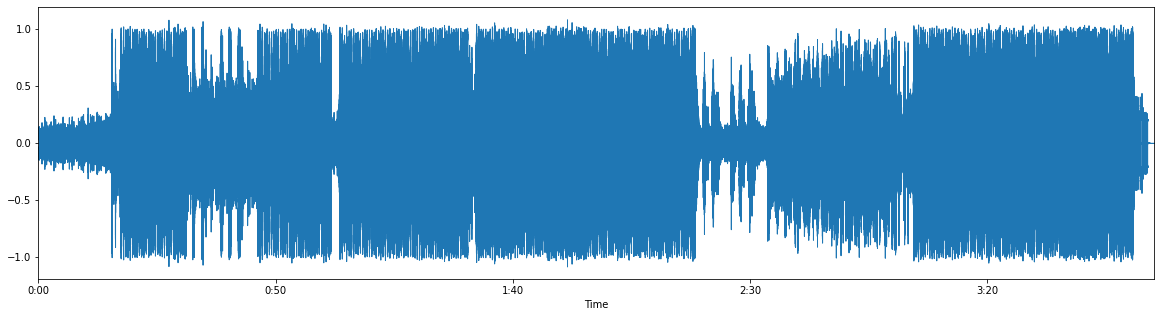

In [79]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(20, 5))
librosa.display.waveplot(df['y'][0], sr=sr)
plt.show()

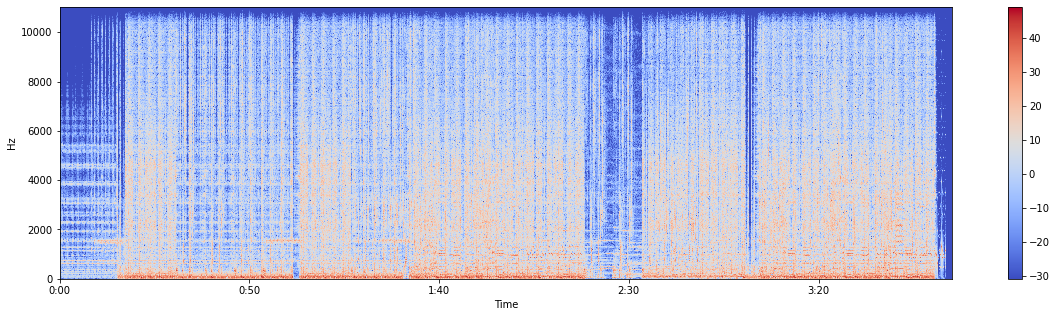

In [80]:
#display Spectrogram
X = librosa.stft(df['y'][0])
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()

In [81]:
chroma=librosa.feature.chroma_cens(y=df['y'][0], sr=sr)
chroma

array([[0.02106905, 0.01916248, 0.017374  , ..., 0.1294441 , 0.1289493 ,
        0.12969727],
       [0.02914175, 0.02818512, 0.02721776, ..., 0.        , 0.        ,
        0.        ],
       [0.2317595 , 0.23113353, 0.23049929, ..., 0.0531691 , 0.05487869,
        0.05677387],
       ...,
       [0.04202043, 0.03843258, 0.03504348, ..., 0.41581993, 0.41622041,
        0.41712942],
       [0.20546211, 0.2029277 , 0.1997534 , ..., 0.42489205, 0.42645145,
        0.42793989],
       [0.44256761, 0.44288935, 0.44283516, ..., 0.38970209, 0.38638814,
        0.38291954]])

In [84]:
start_time = time.process_time()
chroma_means = []
chroma_stds = []

for i in range(0,10):
  chroma=librosa.feature.chroma_cens(y=df['y'][i], sr=sr)
  chroma_mean=np.mean(chroma,axis=1)
  chroma_std=np.std(chroma,axis=1)
  chroma_means.append(chroma_mean)
  chroma_stds.append(chroma_std)

chroma_df = pd.DataFrame()
for j in range(0,10):
  for i in range(0,12):
      chroma_df['chroma_mean_'+str(i)]=chroma_means[j][i]
  for i in range(0,12):
      chroma_df['chroma_std_'+str(i)]=chroma_means[j][i]

for t in range(0,10):
  chroma_df.loc[t]=np.concatenate((chroma_means[t],chroma_stds[t]),axis=0)

print("The whole process took", time.process_time() - start_time, "seconds.")
chroma_df

The whole process took 45.58819936199984 seconds.


,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,chroma_mean_10,chroma_mean_11,chroma_std_0,chroma_std_1,chroma_std_2,chroma_std_3,chroma_std_4,chroma_std_5,chroma_std_6,chroma_std_7,chroma_std_8,chroma_std_9,chroma_std_10,chroma_std_11
0,0.294569,0.215407,0.246435,0.247359,0.388178,0.165868,0.163111,0.286083,0.230327,0.279433,0.237858,0.389818,0.129023,0.081422,0.056026,0.057362,0.122796,0.080289,0.108750,0.103750,0.085208,0.147084,0.071002,0.104137
1,0.191479,0.200705,0.276037,0.284757,0.404900,0.291424,0.321806,0.265946,0.164684,0.194987,0.184919,0.282953,0.122800,0.097881,0.131031,0.096606,0.124818,0.109033,0.110343,0.126626,0.105182,0.129478,0.077904,0.149924
2,0.266289,0.241740,0.403176,0.301557,0.263676,0.263196,0.234987,0.278608,0.202523,0.265765,0.237635,0.222044,0.144043,0.066471,0.161256,0.108078,0.109681,0.110528,0.053377,0.118714,0.059761,0.100723,0.069058,0.074703
3,0.243787,0.245411,0.446739,0.273146,0.208554,0.188817,0.198170,0.277676,0.185307,0.316879,0.246060,0.120430,0.179309,0.106672,0.180875,0.158651,0.098438,0.089142,0.088764,0.141021,0.093946,0.124465,0.138716,0.102257
4,0.261758,0.351479,0.390273,0.439021,0.309039,0.244144,0.160874,0.140100,0.151852,0.144804,0.250516,0.167596,0.107778,0.117638,0.104939,0.120216,0.103344,0.088631,0.105182,0.095497,0.103717,0.083163,0.122709,0.070929
5,0.437198,0.311769,0.211407,0.237526,0.242943,0.229901,0.219856,0.266336,0.238630,0.179357,0.278442,0.244527,0.171038,0.127406,0.070996,0.132360,0.068464,0.129980,0.070873,0.125283,0.124069,0.073690,0.108343,0.100272
6,0.425951,0.236751,0.224656,0.233183,0.243868,0.239796,0.227101,0.412237,0.272907,0.206329,0.210760,0.192810,0.142251,0.090663,0.096513,0.104888,0.075349,0.114680,0.080538,0.118612,0.131418,0.074348,0.072535,0.065737
7,0.222756,0.104159,0.336372,0.139361,0.280787,0.247010,0.140885,0.275928,0.151868,0.427749,0.110691,0.110635,0.196331,0.079585,0.271433,0.091316,0.168315,0.204947,0.088381,0.255741,0.099920,0.212737,0.091620,0.080743
8,0.220123,0.217185,0.221749,0.235654,0.461842,0.195788,0.173930,0.138673,0.189695,0.322728,0.218284,0.405242,0.071900,0.074980,0.073371,0.083431,0.164814,0.056462,0.127241,0.109290,0.057514,0.189532,0.070365,0.144044
9,0.409908,0.209261,0.213764,0.228858,0.227700,0.171294,0.192995,0.346502,0.373116,0.181830,0.219018,0.185561,0.237954,0.095542,0.103299,0.146063,0.066958,0.059769,0.056365,0.089842,0.225244,0.078792,0.109730,0.104362


In [85]:
start_time = time.process_time()
mfccs_means = []
mfccs_stds = []

for i in range(0,10):
  mfccs=librosa.feature.mfcc(y=df['y'][i], sr=sr, n_mfcc=13)
  mfccs_mean=np.mean(mfccs,axis=1)
  mfccs_std=np.std(mfccs,axis=1)
  mfccs_means.append(mfccs_mean)
  mfccs_stds.append(mfccs_std)

mfccs_df = pd.DataFrame()
for j in range(0,10):
  for i in range(0,13):
      mfccs_df['mfccs_mean_'+str(i)]=mfccs_means[j][i]
  for i in range(0,13):
      mfccs_df['mfccs_std_'+str(i)]=mfccs_means[j][i]

for t in range(0,10):
  mfccs_df.loc[t]=np.concatenate((mfccs_means[t],mfccs_stds[t]),axis=0)

print("The whole process took", time.process_time() - start_time, "seconds.")
mfccs_df

The whole process took 6.331654408999839 seconds.


,mfccs_mean_0,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,mfccs_mean_9,mfccs_mean_10,mfccs_mean_11,mfccs_mean_12,mfccs_std_0,mfccs_std_1,mfccs_std_2,mfccs_std_3,mfccs_std_4,mfccs_std_5,mfccs_std_6,mfccs_std_7,mfccs_std_8,mfccs_std_9,mfccs_std_10,mfccs_std_11,mfccs_std_12
0,-37.654358,67.663460,0.942388,34.178772,3.378113,16.745584,3.324119,6.826987,1.352744,6.494529,1.259207,5.647390,-3.073214,93.671104,26.747095,23.447424,17.149723,14.083613,10.480127,10.839019,10.161683,8.864094,8.425319,9.672220,7.671115,7.333817
1,-28.891462,86.036049,-12.129647,28.542631,2.288581,11.241533,3.479470,4.197569,-0.769926,2.889694,-1.045167,5.634623,-3.163526,92.733040,32.366985,17.945078,17.212257,13.244024,10.240697,9.765961,12.800153,7.598576,7.375401,7.758173,8.435557,8.528134
2,-15.397637,89.507843,-19.443382,27.150509,11.750697,5.256334,2.732018,7.478843,-0.389159,5.620080,-1.622302,7.094429,-2.100538,67.063309,23.637360,32.945724,16.921576,14.055963,15.906859,10.471803,8.811559,8.411289,8.534579,6.505669,7.719599,6.965064
3,-58.161968,93.422745,-7.792525,34.684219,-1.070915,10.124834,-1.530084,7.809463,0.033811,5.251872,-1.633342,7.393022,-2.349322,124.683220,25.937548,21.971773,22.284782,13.786450,12.317385,9.867141,10.802601,10.312450,9.670813,8.128033,8.950333,6.973350
4,-117.184372,74.918259,-7.938346,36.189342,10.956831,5.905653,-0.281140,8.058885,0.838476,3.074759,-0.784429,5.013053,-2.121839,90.775032,27.474419,20.788530,17.778612,14.058223,14.942394,9.817245,9.524843,9.923761,8.107090,7.898484,7.833008,8.389798
5,-5.462150,85.270584,-14.772533,28.306757,1.630617,19.311136,-0.561836,10.790383,3.079444,2.649292,-1.655516,6.530945,-3.986277,69.315331,25.496979,17.455097,13.446723,13.055943,11.439414,9.694066,8.342787,7.937640,8.238467,8.271948,7.328403,6.764680
6,-63.338058,80.626579,-4.587942,35.933239,5.808398,13.902342,2.226122,8.487247,1.566076,8.972623,-1.136926,7.134348,-3.875068,75.439850,26.349651,21.723944,13.175791,11.713177,9.237920,8.449481,8.190158,6.897264,7.136526,6.322725,5.927043,5.971120
7,-56.347198,105.761864,-13.775808,33.522797,10.231186,8.260674,0.841878,6.311597,1.100394,5.111420,-6.161120,4.447093,-1.777506,100.045593,33.114819,18.017662,11.672464,11.575095,9.931521,8.790894,7.719104,8.539399,7.364227,8.064248,8.217637,6.726292
8,5.253996,92.714668,-15.219466,37.136620,7.119971,17.025660,4.354941,11.741111,-0.314604,6.277484,-1.310816,5.935150,-2.194336,108.935356,34.106667,21.372200,13.571202,12.093821,9.037366,7.962051,9.043997,8.038079,10.236057,9.083993,8.308691,6.308610
9,-27.000923,101.180420,-10.476495,39.857025,9.614613,11.724453,7.306053,7.485390,4.866873,8.381164,0.431168,8.662457,0.219108,84.845711,36.484280,17.831829,14.116058,11.083939,11.772381,8.507317,7.582011,8.913920,7.284693,7.920508,8.577929,7.507311


In [96]:
from scipy import stats
start_time = time.process_time()
centroid_means = []
centroid_stds = []
centroid_skews = []

for i in range(0,10):
  centroid=librosa.feature.spectral_centroid(y=df['y'][i], sr=sr)
  centroid_mean=np.mean(centroid,axis=1)
  centroid_std=np.std(centroid,axis=1)
  centroid_means.append(centroid_mean)
  centroid_stds.append(centroid_std)
  cent_skew=stats.skew(centroid,axis=1)[0]
  centroid_skews.append(cent_skew)

centroid_df = pd.DataFrame()

centroid_df['centroid_mean'] = centroid_means
centroid_df['centroid_std'] = centroid_stds
centroid_df['centroid_skews'] = centroid_skews

centroid_df

,centroid_mean,centroid_std,centroid_skews
0,[2808.5950235854543],[740.3573673558134],0.325101
1,[2496.680445407433],[744.5478219272285],0.669115
2,[2417.7685671443624],[585.2500133756254],1.679327
3,[2169.368763316295],[656.55044460748],-0.128059
4,[2587.249974251442],[590.0520236226934],-0.941074
5,[2455.3968938185835],[558.1421085570366],0.348422
6,[2492.786589336389],[688.8766824883318],1.305687
7,[2005.9261031565482],[666.921472923998],0.231420
8,[2298.9877301851275],[831.3593904924858],0.271348
9,[2085.6044499826926],[741.3890675788474],0.377829


In [97]:
contrast_means = []
contrast_stds = []

for i in range(0,10):
  contrast=librosa.feature.spectral_contrast(y=df['y'][i], sr=sr)
  contrast_mean=np.mean(contrast,axis=1)
  contrast_std=np.std(contrast,axis=1)
  contrast_means.append(contrast_mean)
  contrast_stds.append(contrast_std)

contrast_df = pd.DataFrame()

contrast_df['contrast_mean'] = contrast_means
contrast_df['contrast_std'] = contrast_stds

contrast_df

,contrast_mean,contrast_std
0,"[20.21197296554648, 13.583076965898963, 16.284...","[4.711139696652714, 3.957031063598238, 4.03550..."
1,"[19.084974506982316, 13.521046263270097, 16.89...","[4.607843625661251, 3.941052808821665, 4.52488..."
2,"[18.170296371332768, 13.445971469557357, 16.52...","[4.765331030700743, 4.145391579416664, 4.14414..."
3,"[19.45497861881616, 14.950341945822489, 17.089...","[4.868742402716157, 4.622364964250456, 4.37640..."
4,"[17.72675505514026, 13.202554570742498, 15.828...","[4.713381228540681, 3.9611314798867023, 3.9778..."
5,"[18.965695600127592, 14.538426741949076, 16.40...","[4.748410381623941, 4.335635700651098, 4.21044..."
6,"[18.72942999231823, 14.015679842006863, 16.283...","[4.798092819923799, 4.006897914813683, 4.00417..."
7,"[19.260674274316212, 15.750397859618696, 19.15...","[4.550358112732913, 3.9821822133954816, 4.3874..."
8,"[18.932272786346473, 15.004004749691509, 16.88...","[4.867765373667627, 4.039725986445309, 4.55619..."
9,"[20.28571707465459, 14.81743754940849, 16.8983...","[5.031051473583971, 4.0514324724719994, 3.8995..."


In [99]:
roll_off_means = []
roll_off_stds = []
roll_off_skews = []

for i in range(0,10):
  roll_off=librosa.feature.spectral_rolloff(y=df['y'][i], sr=sr)
  roll_off_mean=np.mean(roll_off,axis=1)
  roll_off_std=np.std(roll_off,axis=1)
  roll_off_means.append(roll_off_mean)
  roll_off_stds.append(roll_off_std)
  roll_off_skew=stats.skew(roll_off,axis=1)[0]
  roll_off_skews.append(roll_off_skew)

roll_off_df = pd.DataFrame()

roll_off_df['roll_off_mean'] = roll_off_means
roll_off_df['roll_off_std'] = roll_off_stds
roll_off_df['roll_off_skew'] = roll_off_skews

roll_off_df

,roll_off_mean,roll_off_std,roll_off_skew
0,[5808.218122347513],[1354.4840599636268],-0.741044
1,[5089.71172760368],[1631.253374835172],-0.305273
2,[4901.467248657652],[1417.3603734488468],0.675053
3,[4511.518900434291],[1471.6708094341527],-0.583644
4,[5249.219970380841],[1293.0948367574663],-0.885404
5,[5181.075122360463],[1193.292455694359],-0.379777
6,[5293.969268941834],[1350.3071344669527],0.235750
7,[4116.468073648699],[1464.2960433144547],0.209642
8,[4686.788584401778],[1716.6418667860366],-0.004971
9,[4464.726107633566],[1574.3165727744313],0.456060


In [100]:
zero_means = []
zero_stds = []
zero_skews = []

for i in range(0,10):
  zero=librosa.feature.zero_crossing_rate(df['y'][i])
  zero_mean=np.mean(zero,axis=1)
  zero_std=np.std(zero,axis=1)
  zero_means.append(zero_mean)
  zero_stds.append(zero_std)
  zero_skew=stats.skew(zero,axis=1)[0]
  zero_skews.append(zero_skew)

zero_df = pd.DataFrame()

zero_df['zero_mean'] = zero_means
zero_df['zero_std'] =zero_stds
zero_df['zero_skew'] = zero_skews

zero_df

,zero_mean,zero_std,zero_skew
0,[0.13062323424545993],[0.06404525254908573],1.533071
1,[0.12630442272016926],[0.05946467067702514],2.194552
2,[0.11849069995712165],[0.046314402714750666],2.478800
3,[0.09323375596172156],[0.04114545409231301],1.253747
4,[0.12131255912831118],[0.04823211246214606],0.481968
5,[0.10935793234420253],[0.04340117035086037],2.546759
6,[0.11193360798708737],[0.057352932485760566],2.650474
7,[0.08626032299320745],[0.04000533616992051],0.943590
8,[0.1082655540212678],[0.05376211803448924],0.816477
9,[0.07720512679860561],[0.04381481643922352],1.672364


In [113]:
tempos = []
frames = []
for j in range(0,10):
  tempo, beat = librosa.beat.beat_track(y=df['y'][j], sr=sr)
  tempos.append(tempo)
  frames.append(beat)

beat_df = pd.DataFrame()

beat_df['tempo'] = tempos
beat_df['frame'] =frames
beat_df

,tempo,frame
0,123.046875,"[3, 29, 50, 71, 91, 112, 133, 153, 174, 195, 2..."
1,75.999540,"[7, 41, 76, 111, 148, 185, 220, 254, 289, 323,..."
2,123.046875,"[15, 37, 59, 81, 102, 123, 144, 165, 186, 206,..."
3,117.453835,"[281, 303, 324, 346, 367, 389, 410, 432, 453, ..."
4,95.703125,"[54, 81, 107, 134, 160, 187, 214, 242, 270, 29..."
5,89.102909,"[12, 42, 72, 101, 130, 160, 189, 218, 248, 277..."
6,135.999178,"[57, 75, 94, 113, 131, 150, 169, 188, 206, 224..."
7,135.999178,"[15, 33, 52, 71, 90, 108, 126, 145, 163, 182, ..."
8,135.999178,"[13, 33, 52, 71, 90, 109, 129, 148, 167, 186, ..."
9,112.347147,"[11, 34, 57, 80, 102, 124, 147, 170, 192, 215,..."


In [116]:
tempograms = []
for j in range(0,10):
  tempogram = librosa.feature.tempogram(y = df['y'][j], sr=sr)
  tempograms.append(tempogram)

tempogram_df = pd.DataFrame()

tempogram_df['tempogram'] = tempograms
tempogram_df

,tempogram
0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
1,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
3,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
5,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
6,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
7,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
8,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
9,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."


In [118]:
melspectrograms = []
for j in range(0,10):
  melspectrogram = librosa.feature.melspectrogram(y = df['y'][j], sr=sr)
  melspectrograms.append(melspectrogram)

melspectrogram_df = pd.DataFrame()

melspectrogram_df['melspectrogram'] = melspectrograms
melspectrogram_df

,melspectrogram
0,"[[4.2577597e-08, 1.1117181e-05, 0.00043577992,..."
1,"[[3.843235e-05, 7.5607895e-05, 2.4257275e-05, ..."
2,"[[0.0, 0.0, 0.0, 0.0, 1.7216453e-16, 1.6420552..."
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.306071e..."
6,"[[7.0815167, 6.6117415, 5.1675854, 3.9262784, ..."
7,"[[0.0, 0.0, 0.0, 0.0, 0.0, 3.4503874e-15, 3.27..."
8,"[[0.0, 0.0, 0.0, 4.4050026e-32, 8.5011584e-07,..."
9,"[[6.9354134e-11, 2.9585183e-09, 1.2477373e-07,..."


In [ ]:
#chroma --> 12 col 
#mfccs  --> 12 col
#centroid --> 3 col
#contrast --> 2 col
#roll off --> 3 col
#zero crossing rate --> 3 col
#beat --> 2 col
#tempogram --> 1 col
#melspectrogram --> 1 col

#Total: 39 columns 